In [1]:


# Importing dependencies
import math 
import numpy as np
import pandas as pd
import datetime
from pandas import Series, DataFrame
## Note: Install pandas_datareader
## pip install pandas-datareader
import pandas_datareader.data as web
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [2]:
def calcDate(interval):
    
    if interval == 'month':
        time = 30
    elif interval == 'year':
        time = 365
    elif interval == 'fiveYear':
        time = 1825
    tod = datetime.datetime.now()
    d = datetime.timedelta(days = time)
    a = tod - d
    selectedDate = a.date().isoformat()
#     print(selectedDate)
    return selectedDate

calcDate('fiveYear')

'2015-05-12'

In [3]:
## Loading Yahoo Finance data set form 2016
# Get start and end dates 

# times = 1 year 6 month 3 month  

# start_date = datetime.datetime(2019, 5, 9)
start_date = calcDate('year')
## Select today's date as end date
end_date = datetime.datetime.now().date().isoformat() 
print(end_date)
stocks_df = web.DataReader('AAPL', 'yahoo', start_date, end_date)

# Displaying letest 5 records
stocks_df.tail()

2020-05-10


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,293.690002,286.320007,289.170013,293.160004,33392000.0,292.368561
2020-05-05,301.000000,294.459991,295.059998,297.559998,36937800.0,296.756683
2020-05-06,303.239990,298.869995,300.459991,300.630005,35583400.0,299.818390
2020-05-07,305.170013,301.970001,303.220001,303.739990,28803800.0,302.919983
2020-05-08,310.350006,304.290009,305.640015,310.130005,33459600.0,310.130005


In [4]:
## Getting Final Closing price
closing_price_df= stocks_df['Adj Close']

closing_price_df.index = pd.to_datetime(closing_price_df.index)

closing_price_df.tail()

closing_price_df.head()

Date
2019-05-13    183.529678
2019-05-14    186.434998
2019-05-15    188.668335
2019-05-16    187.838257
2019-05-17    186.770996
Name: Adj Close, dtype: float64

In [5]:
## Calculate 50 day Moving Average
ma_50day= closing_price_df.rolling(window=50).mean()

ma_50day.index = pd.to_datetime(ma_50day.index)

## Removing NULL Coulumns
ma_50day.dropna(inplace=True)
ma_50day.head()

ma_50day.head()

Date
2019-07-23    191.389267
2019-07-24    191.842853
2019-07-25    192.205723
2019-07-26    192.538156
2019-07-29    192.925532
Name: Adj Close, dtype: float64

In [6]:
## Calculate 200 day Moving Average
ma_200day= closing_price_df.rolling(window=200).mean()

ma_200day.index = pd.to_datetime(ma_200day.index)

## Removing NULL Coulumns
ma_200day.dropna(inplace=True)
ma_200day.head()

ma_200day.head()

Date
2020-02-26    239.180519
2020-02-27    239.626779
2020-02-28    240.057714
2020-03-02    240.604388
2020-03-03    241.107892
Name: Adj Close, dtype: float64

C:\Users\mepps\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


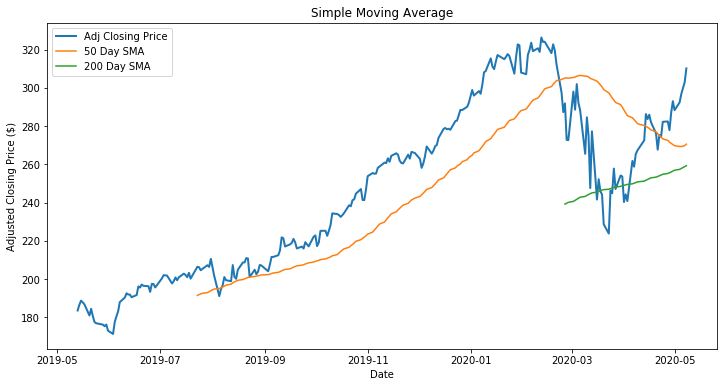

In [7]:
## Displaying Closing Price and Moving Average in Charts

#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(closing_price_df, label='Adj Closing Price', linewidth = 2)
plt.plot(ma_50day, label='50 Day SMA', linewidth = 1.5)
plt.plot(ma_200day, label='200 Day SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.title('Simple Moving Average')
plt.legend()
plt.show()

# ML PART #

In [8]:
## Analysing Multiple Stocks
tickers =['AMZN', 'GOOG', 'IBM', 'MSFT']
comp_stocks_df = web.DataReader(tickers,'yahoo',start_date,end_date)['Adj Close']
comp_stocks_df.head()

Symbols,AMZN,GOOG,IBM,MSFT
Date,,,,
2019-05-13,1822.680054,1132.030029,125.365395,121.739311
2019-05-14,1840.119995,1120.439941,127.168320,123.101303
2019-05-15,1871.150024,1164.209961,128.208099,124.834839
2019-05-16,1907.569946,1178.979980,129.619919,127.717468
2019-05-17,1869.000000,1162.300049,128.131775,126.865570


In [9]:
retscomp =comp_stocks_df.pct_change()
corr = retscomp.corr()
corr.head()


Symbols,AMZN,GOOG,IBM,MSFT
Symbols,,,,
AMZN,1.000000,0.680390,0.624463,0.752131
GOOG,0.680390,1.000000,0.711503,0.848775
IBM,0.624463,0.711503,1.000000,0.758020
MSFT,0.752131,0.848775,0.758020,1.000000


No handles with labels found to put in legend.


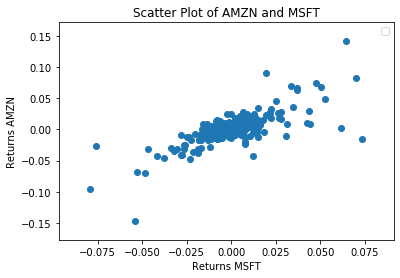

In [10]:
plt.scatter(retscomp.AMZN, retscomp.MSFT)
plt.xlabel("Returns MSFT")
plt.ylabel("Returns AMZN")

plt.title('Scatter Plot of AMZN and MSFT')
plt.legend()
plt.show()


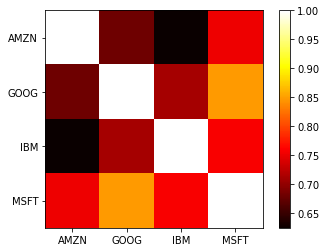

In [11]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

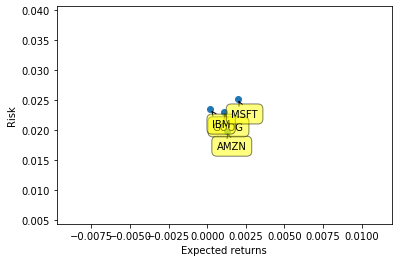

In [12]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [13]:
#high low percentage 
dfreg = stocks_df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (stocks_df['High'] - stocks_df['Low']) / stocks_df['Close'] *100.0
#percentage change 
dfreg['PCT_change'] = (stocks_df['Close'] - stocks_df['Open']) / stocks_df['Open']  * 100.0
dfreg


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-05-13,183.529678,57430600.0,3.569885,-1.060149
2019-05-14,186.434998,36529700.0,2.273928,1.207017
2019-05-15,188.668335,26544700.0,3.001255,2.496373
2019-05-16,187.838257,33031400.0,1.909725,0.089515
2019-05-17,186.770996,32879100.0,2.190476,1.107370
2019-05-20,180.930695,38612300.0,2.222955,-0.234311
2019-05-21,184.399307,28364800.0,1.768490,0.745063
2019-05-22,180.624329,29748600.0,1.728856,-1.018090
2019-05-23,177.541138,36529700.0,1.519534,-0.077864


In [14]:
#drop missing value 
dfreg.fillna(value=99999, inplace = True)
forecast_out = int(math.ceil(0.01*len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

#linear regression
#X = preprocessing.scale(X)

#train for model generation and evaluation 
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
#quadratic regression
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

C:\Users\mepps\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20133e-33): result may not be accurate.
  overwrite_a=True).T
C:\Users\mepps\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71621e-49): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [16]:
#KNN Regression 
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [17]:
#evaluation 
conf_reg = clfreg.score(X_test, y_test)
confpoly2 = clfpoly2.score(X_test, y_test)
confpoly3 = clfpoly3.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)
# hmmmm
confidenceknn

-0.3297779890287418

In [18]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([300.80841101, 304.66052817, 309.32716987])

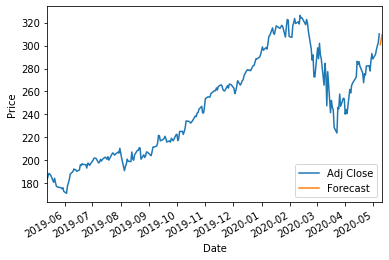

In [19]:
#plotting prediciton 
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()